In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

movies_df = pd.read_csv("data/movies.csv")
links_df = pd.read_csv("data/links.csv")
ratings_df = pd.read_csv("data/ratings.csv")
tags_df = pd.read_csv("data/tags.csv")


links_df.set_index('movieId')

movie_link_df = movies_df.set_index('movieId').join(links_df.set_index('movieId'))
display(movie_link_df.head(10))

movie_rating_df = movies_df.set_index('movieId').join(ratings_df.set_index('movieId'))
display(movie_rating_df.head(10))

movie_tag_df = movies_df.set_index('movieId').join(tags_df.set_index('movieId'))
display(movie_tag_df.head(10))


,title,genres,imdbId,tmdbId
movieId,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0
2,Jumanji (1995),Adventure|Children|Fantasy,113497,8844.0
3,Grumpier Old Men (1995),Comedy|Romance,113228,15602.0
4,Waiting to Exhale (1995),Comedy|Drama|Romance,114885,31357.0
5,Father of the Bride Part II (1995),Comedy,113041,11862.0
6,Heat (1995),Action|Crime|Thriller,113277,949.0
7,Sabrina (1995),Comedy|Romance,114319,11860.0
8,Tom and Huck (1995),Adventure|Children,112302,45325.0
9,Sudden Death (1995),Action,114576,9091.0


,title,genres,userId,rating,timestamp
movieId,,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1.0,4.0,9.649827e+08
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5.0,4.0,8.474350e+08
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7.0,4.5,1.106636e+09
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15.0,2.5,1.510578e+09
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17.0,4.5,1.305696e+09
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,18.0,3.5,1.455210e+09
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,19.0,4.0,9.657056e+08
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,21.0,3.5,1.407619e+09
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,27.0,3.0,9.626853e+08


,title,genres,userId,tag,timestamp
movieId,,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,336.0,pixar,1.139046e+09
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,474.0,pixar,1.137207e+09
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,567.0,fun,1.525286e+09
2,Jumanji (1995),Adventure|Children|Fantasy,62.0,fantasy,1.528844e+09
2,Jumanji (1995),Adventure|Children|Fantasy,62.0,magic board game,1.528844e+09
2,Jumanji (1995),Adventure|Children|Fantasy,62.0,Robin Williams,1.528844e+09
2,Jumanji (1995),Adventure|Children|Fantasy,474.0,game,1.137376e+09
3,Grumpier Old Men (1995),Comedy|Romance,289.0,moldy,1.143425e+09
3,Grumpier Old Men (1995),Comedy|Romance,289.0,old,1.143425e+09


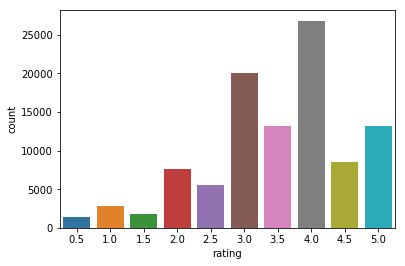

In [3]:
# Show chart

sns.countplot(x='rating', data=ratings_df)

Movies have high rating from 3 to 5.

In [3]:
movie_rating_splited = movie_rating_df.assign(genres=movie_rating_df.genres.str.split('|', expand=True))

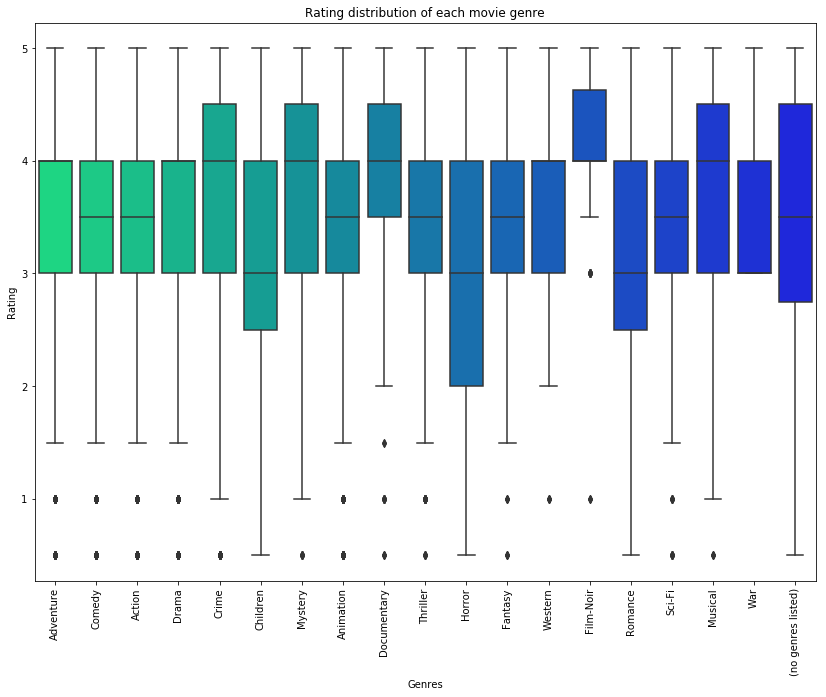

In [4]:
plt.figure(figsize = (14,10))
sns.boxplot(x = 'genres', y = 'rating', data = movie_rating_splited, palette="winter_r")
plt.xticks(rotation=90)
plt.title("Rating distribution of each movie genre")
plt.xlabel("Genres")
plt.ylabel("Rating")
plt.subplots_adjust(wspace = 0.9, hspace = 0.9, top = 0.9)
plt.show()

Almost movie genre have rating from 3 to 4.5

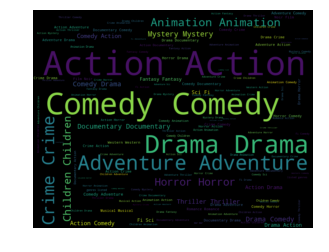

In [6]:
from wordcloud import WordCloud
# Generate a word cloud image
wordcloud = WordCloud(width=900, height=700, margin=0).generate(movie_rating_splited.genres.to_string())
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()


Many movie genres are action, Comedy, Drama, Adventure.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]), <a list of 19 Text xticklabel objects>)

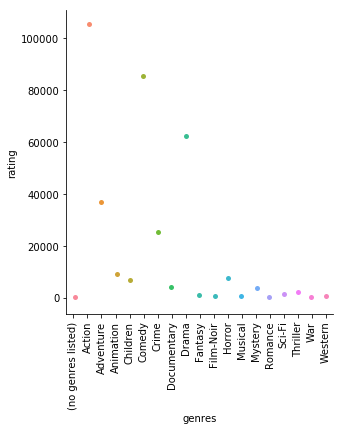

In [4]:
# sp = movie_rating_splited.drop('userId', axis=1)
# sp = movie_rating_splited.drop('timestamp', axis=1)
# gr = sp.groupby(['genres']).sum().reset_index()
# sns.catplot(x='genres', y='rating', data=gr)
# plt.xticks(rotation=90)

In [5]:
# sp = movie_rating_df.assign(genres=movie_rating_df.genres.str.split('|', expand=True))

sp = movie_rating_splited.drop('userId', axis=1)
sp = movie_rating_splited.drop('timestamp', axis=1)
gr = sp.groupby(['genres', 'rating']).count().reset_index()


Action, Comedy, Drama movie genres have high rating amount.

In [7]:
# sp = movie_rating_df.assign(genres=movie_rating_df.genres.str.split('|', expand=True))

sp = movie_rating_splited.drop('timestamp', axis=1)
sp = movie_rating_splited.drop('title', axis=1)
gr = sp.groupby(['genres', 'rating']).count().reset_index()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 <a list of 19 Text xticklabel objects>)

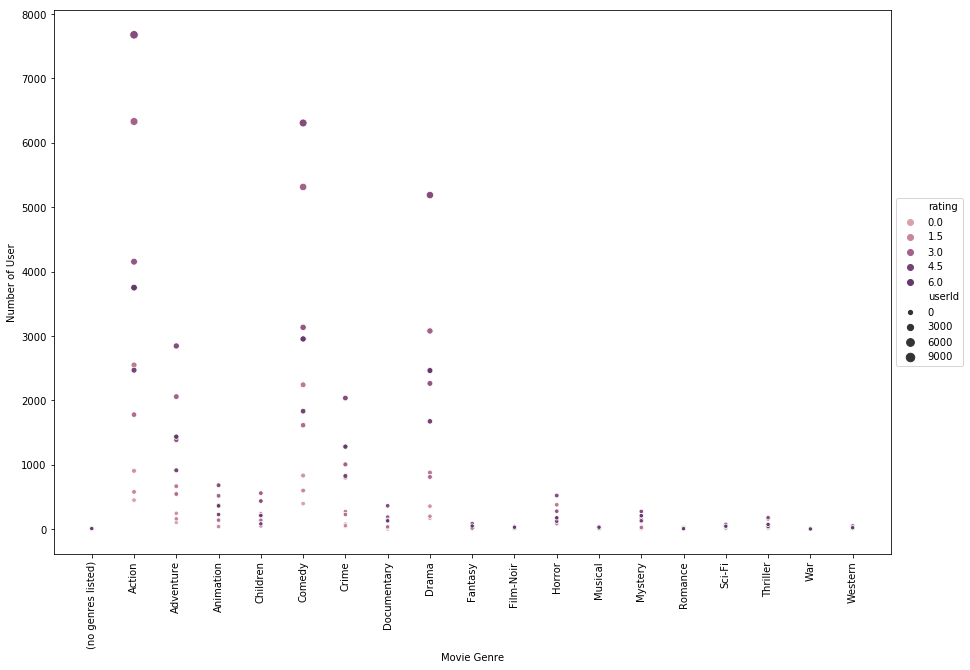

In [83]:
f,ax = plt.subplots(figsize=(15,10))
cmap = sns.cubehelix_palette(dark=.3, light=.7, as_cmap=True)
sns.scatterplot(x='genres', y='userId', hue='rating', size='userId',palette=cmap, data=gr)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Movie Genre')
plt.ylabel('Number of User')
plt.xticks(rotation=90)

In [75]:
# movie_rating_extract_year = movie_rating_splited.assign(title=movie_rating_splited.title.str.split('(', expand=True))
movie_rating = movie_rating_splited.drop('timestamp', axis=1)
movie_rating['year'] = movie_rating.title.str.extract('\((\d{4})\)$')
movie_rating.year.fillna(0, inplace=True)
# 
movie_rating.year = movie_rating.year.astype('int64', errors='ignore')

movie_rating = movie_rating.sort_values('year')
movie_rating = movie_rating.groupby(['year', 'genres']).sum().reset_index()
recently_data = movie_rating[movie_rating.year > 2005]

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 <a list of 17 Text xticklabel objects>)

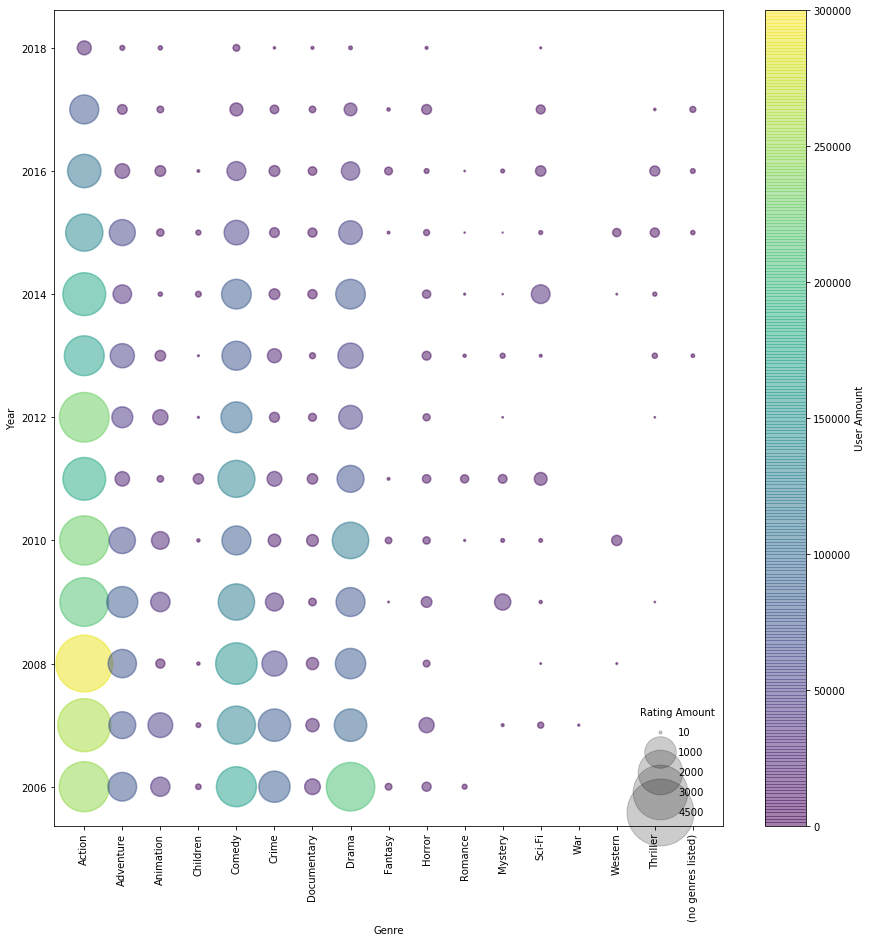

In [74]:
genres = recently_data['genres']
year = recently_data['year']
ratingAmount = recently_data['rating']
userAmount = recently_data['userId']

f,ax = plt.subplots(figsize=(15,15))
plt.scatter(genres, year, label=None, c=userAmount, s=ratingAmount, linewidth=1.5, alpha=0.5)
plt.axis(aspect='equal')
plt.xlabel('Genre')
plt.ylabel('Year')
plt.colorbar(label='User Amount')
plt.clim(0, 300000)

for rating in [10, 1000, 2000, 3000, 4500]:
    plt.scatter([], [], c='k', alpha=0.2, s=rating, label=str(rating))
plt.legend(scatterpoints=1, frameon=False, labelspacing=1, title='Rating Amount')
plt.xticks(rotation=90)